###  Import necessary libraries


In [14]:
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image

# Set plot size
plt.rcParams['figure.figsize'] = [20, 10]

# Import from actual package rather than installed in environment to make easier to make changes
path_root = os.path.abspath('..')
sys.path.append(str(path_root))
import defect_detection


### Define output and data folders


In [15]:
# Define the output folder
output_folder = "output/"  
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

# Define model and image folders
model_folder = "data/Best_Models/"  
image_folder = 'data/Unirradiated_images'  
image_type = 'unirradiated'  # Used to get model name (irradiated or nonirradiated)


### Set model parameters

In [16]:
nclass = 5  # Number of classes
model = 'segnet'  # Model name
lr = 1e-4  # Learning rate
opt = 'Adam'  # Optimizer
loss = 'EWCE'  # Loss function

### Load the trained model

Found files ['TTP_C13-PA-PHYS-THK-121_LV_5kv_PC16_WD4.6_20Pa_2kx-B.tif', 'TTP_C13-PA-PHYS-THK-121_LV_5kv_PC16_WD4.6_20Pa_2kx-A-2.tif']
TTP_C13-PA-PHYS-THK-121_LV_5kv_PC16_WD4.6_20Pa_2kx-B.tif


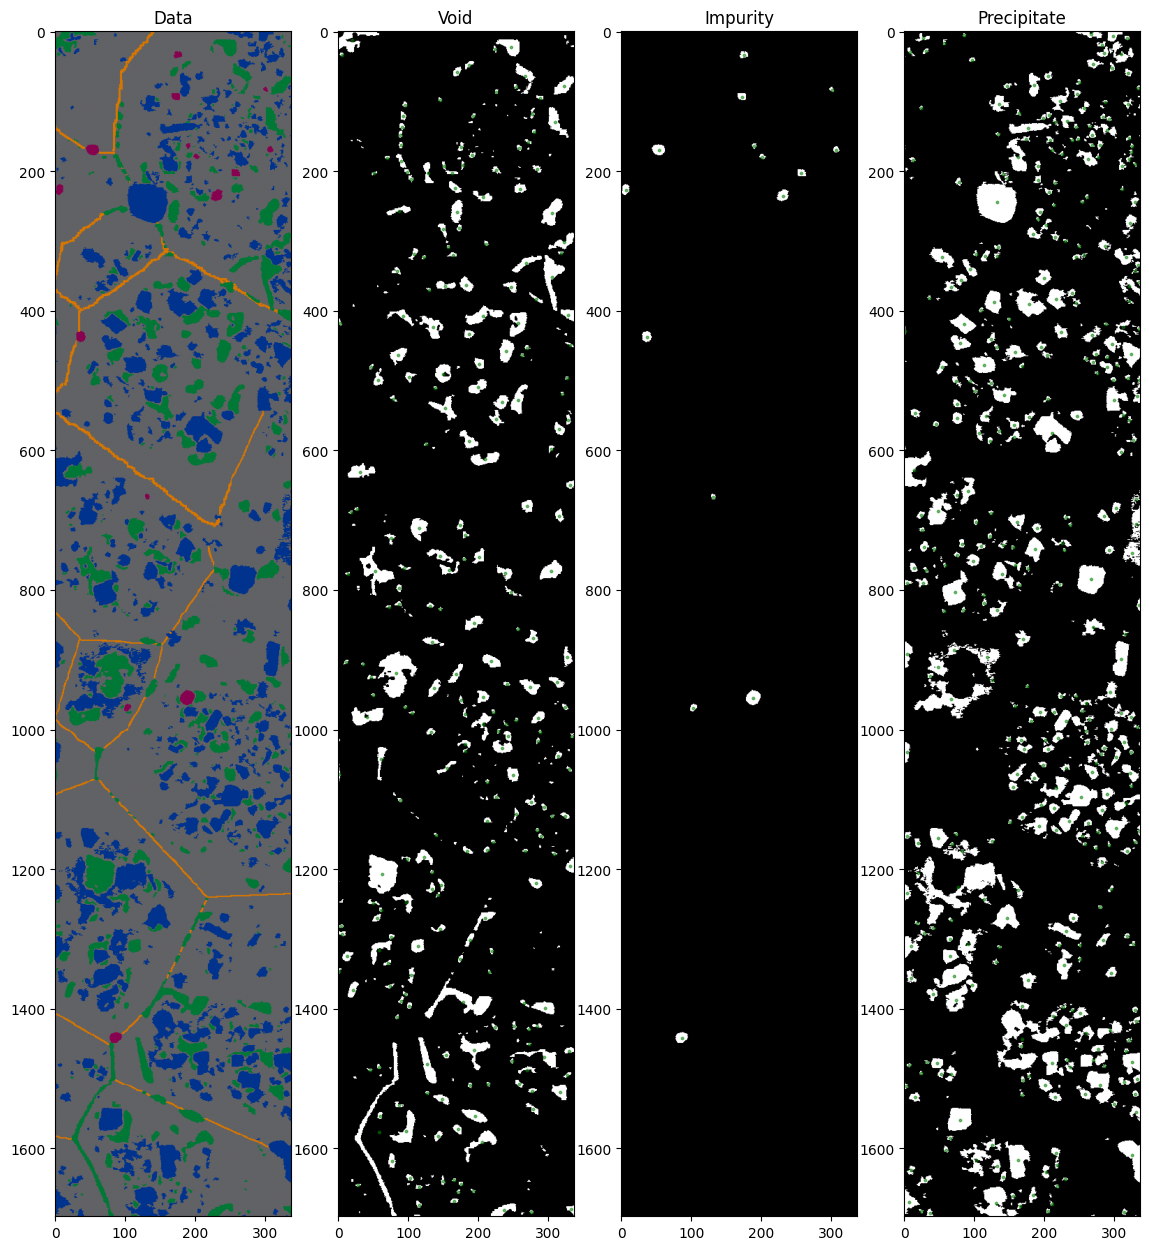

TTP_C13-PA-PHYS-THK-121_LV_5kv_PC16_WD4.6_20Pa_2kx-A-2.tif
EWCE as: [1.0, 10.0, 10.0, 10.0, 10.0]
data/Best_Models/segnet_lr1e-04_unirradiated_Adam_new_augmentation_EWCE_5
pt file loaded
data/Best_Models/segnet_lr1e-04_unirradiated_Adam_new_augmentation_EWCE_5class_model_weights.pt


In [17]:
# Initialize the Trainer class with specified parameters
t = defect_detection.train.Trainer(
    nclass=nclass,  # Number of classes the model is trained to predict, e.g., 5
    image_folder=image_folder,  # Path to the folder containing the training images, e.g., 'data/Irradiated_images'
    loss_type=loss,  # Type of loss function to use during training, e.g., 'EWCE'
    filename='TTP*.tif',  # Regex pattern to match filenames in the image folder
    folder=output_folder,  # Path to the output folder where results and models are saved, e.g., 'output/'
    learn_rate=lr,  # Learning rate for the optimizer, e.g., 1e-4
    model_name_suffix=f'_lr{lr:.0e}_{image_type}_{opt}_new_augmentation',  # Suffix to append to the saved model name for identification
    model_path=model_folder,  # Path to the folder containing the model files, e.g., 'data/Best_Models/'
    optimize_option=opt,  # The optimizer to use for training, e.g., 'Adam'
    saveplot=True,  # Whether to save plots during training, True/False
    model_name=model,  # Name of the model architecture to use, e.g., 'smallbayessegnet'
    epochs=500,  # Number of epochs to train the model
    load_pt_files=True,  # Whether to load existing model weights from disk, True/False
    test_version=False,  # Whether to use a test version with a smaller dataset, True/False
    dummy_ycat=False,  # Whether to use a dummy placeholder for the labeled input (ycat), True/False
    include_metadata=False  # Whether to include metadata in the training process, True/False
)


### Predictions

In [18]:

# ## obtain predictions 
t.test_predictions()
t.performance_metrics()
print(f"Find all metrics in the folder here: {t.train_description}")


p_test
(array([0, 1, 2, 3, 4]), array([1066486,   63894,   53626,    7385,   37409]))
(1920, 640)
p_test
(array([0, 1, 2, 3, 4]), array([1083981,   57085,   41211,    7208,   39315]))
(1920, 640)


/Users/oost464/opt/anaconda3/envs/ttp_env_new/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/oost464/opt/anaconda3/envs/ttp_env_new/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/oost464/opt/anaconda3/envs/ttp_env_new/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/oost464/opt/anaconda3/envs/ttp_env_new/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'accuracy_df': {'file': {'TTP_C13-PA-PHYS-THK-121_LV_5kv_PC16_WD4.6_20Pa_2kx-B.tif':                     0
   Grain        0.980124
   Boundary     0.783019
   Void         0.792873
   Impurity     0.843667
   Precipitate  0.946855
   Overall      0.869308,
   'TTP_C13-PA-PHYS-THK-121_LV_5kv_PC16_WD4.6_20Pa_2kx-A-2.tif':                     0
   Grain        0.978318
   Boundary     0.784664
   Void         0.866770
   Impurity     0.803046
   Precipitate  0.894960
   Overall      0.865552},
  'overall':                     0
  Grain        0.979213
  Boundary     0.783792
  Void         0.823151
  Impurity     0.823723
  Precipitate  0.919451
  Overall      0.865866,
  'average':                     0
  Grain        0.979221
  Boundary     0.783841
  Void         0.829821
  Impurity     0.823357
  Precipitate  0.920907
  Overall      0.867430},
 'iou_df': {'pout': {'TTP_C13-PA-PHYS-THK-121_LV_5kv_PC16_WD4.6_20Pa_2kx-B.tif':              Precision    Recall  Fscore-0.5  Fscore-1  Fsco

Find all metrics here: output/segnet_lr1e-04_unirradiated_Adam_new_augmentation_EWCE_5


### View Predicted Images

X_test Image for TTP_C13-PA-PHYS-THK-121_LV_5kv_PC16_WD4.6_20Pa_2kx-B.tif


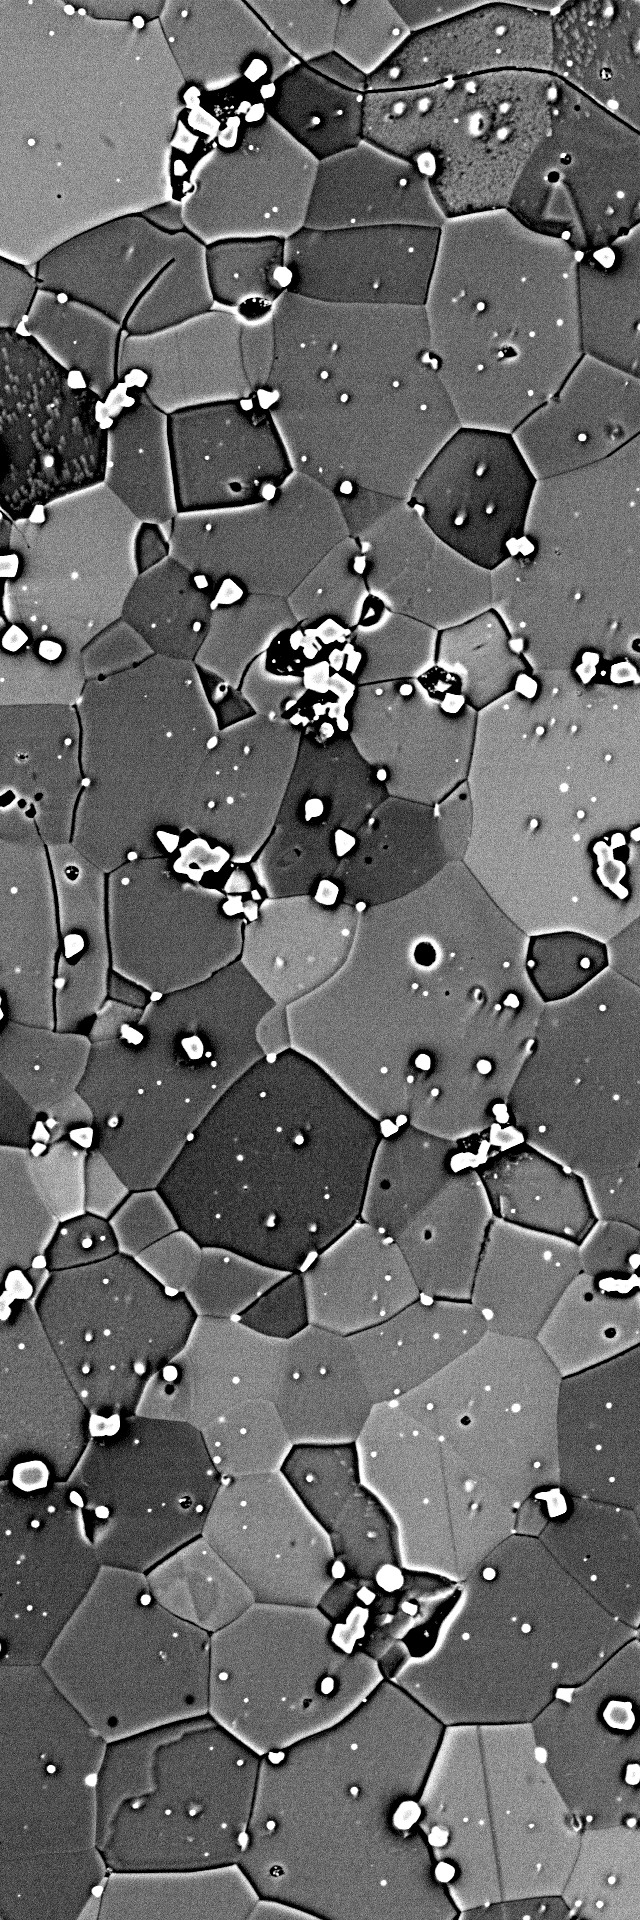

Predicted Image for TTP_C13-PA-PHYS-THK-121_LV_5kv_PC16_WD4.6_20Pa_2kx-B.tif


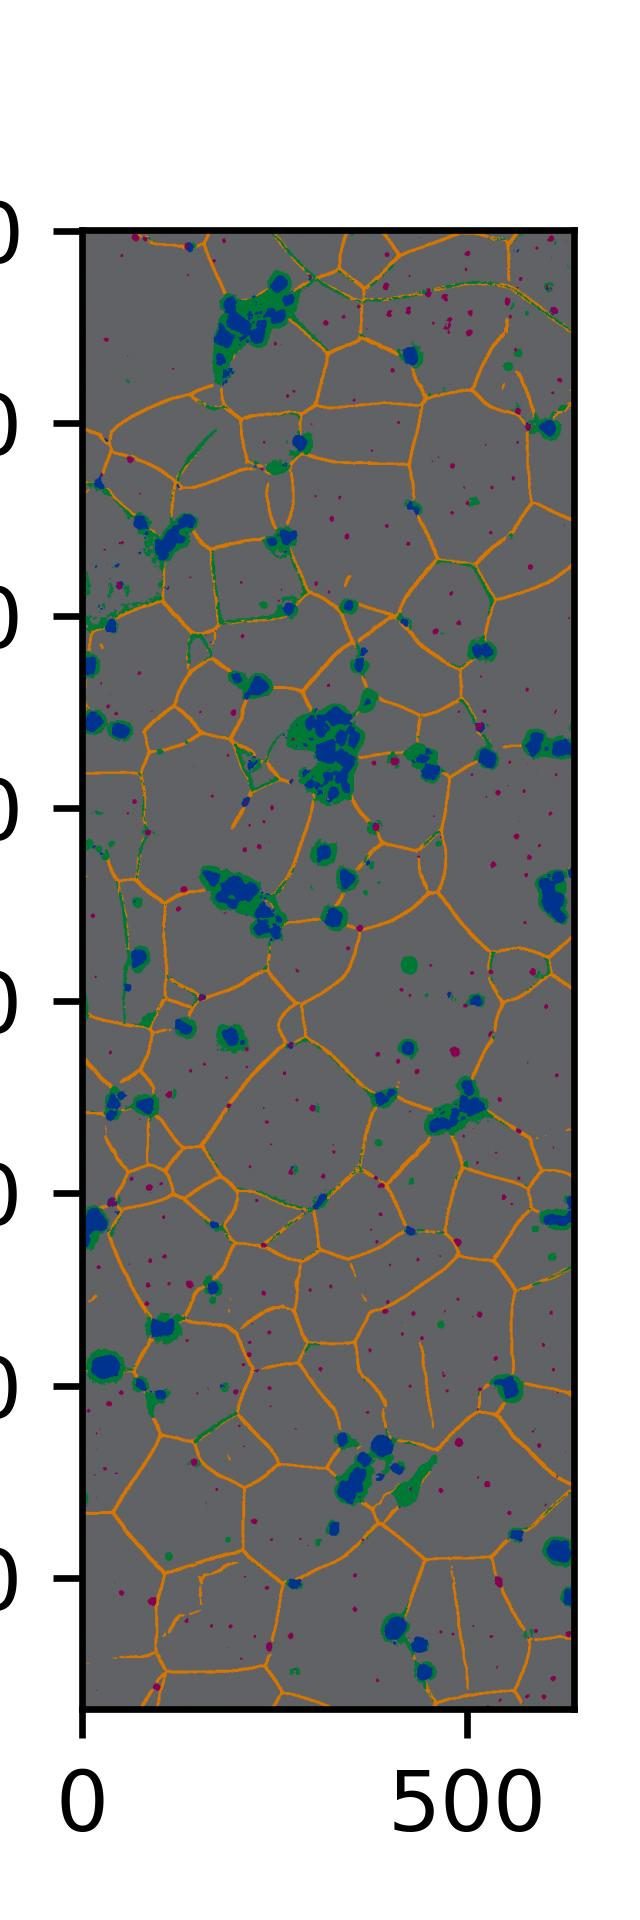

X_test Image for TTP_C13-PA-PHYS-THK-121_LV_5kv_PC16_WD4.6_20Pa_2kx-A-2.tif


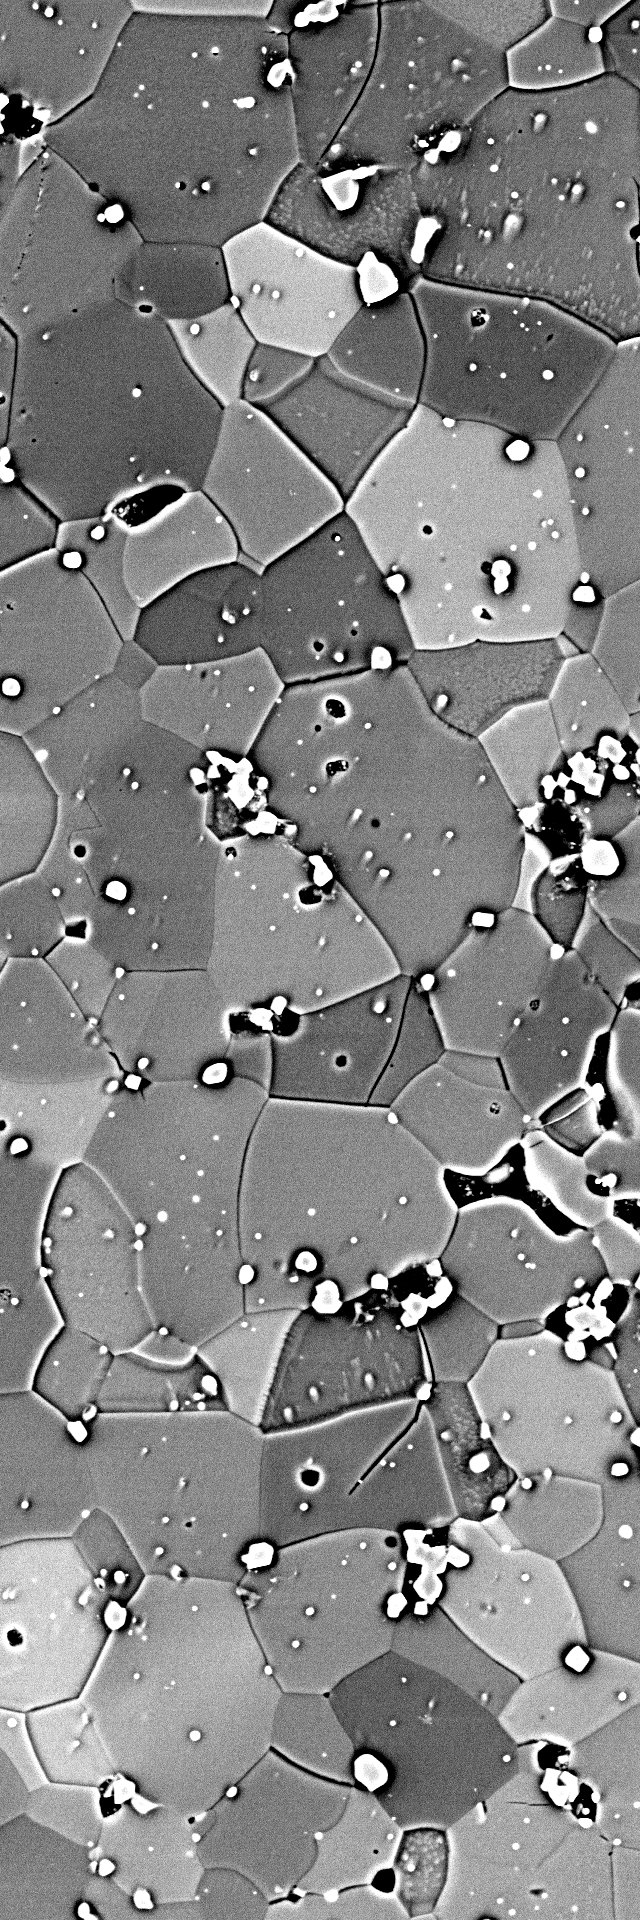

Predicted Image for TTP_C13-PA-PHYS-THK-121_LV_5kv_PC16_WD4.6_20Pa_2kx-A-2.tif


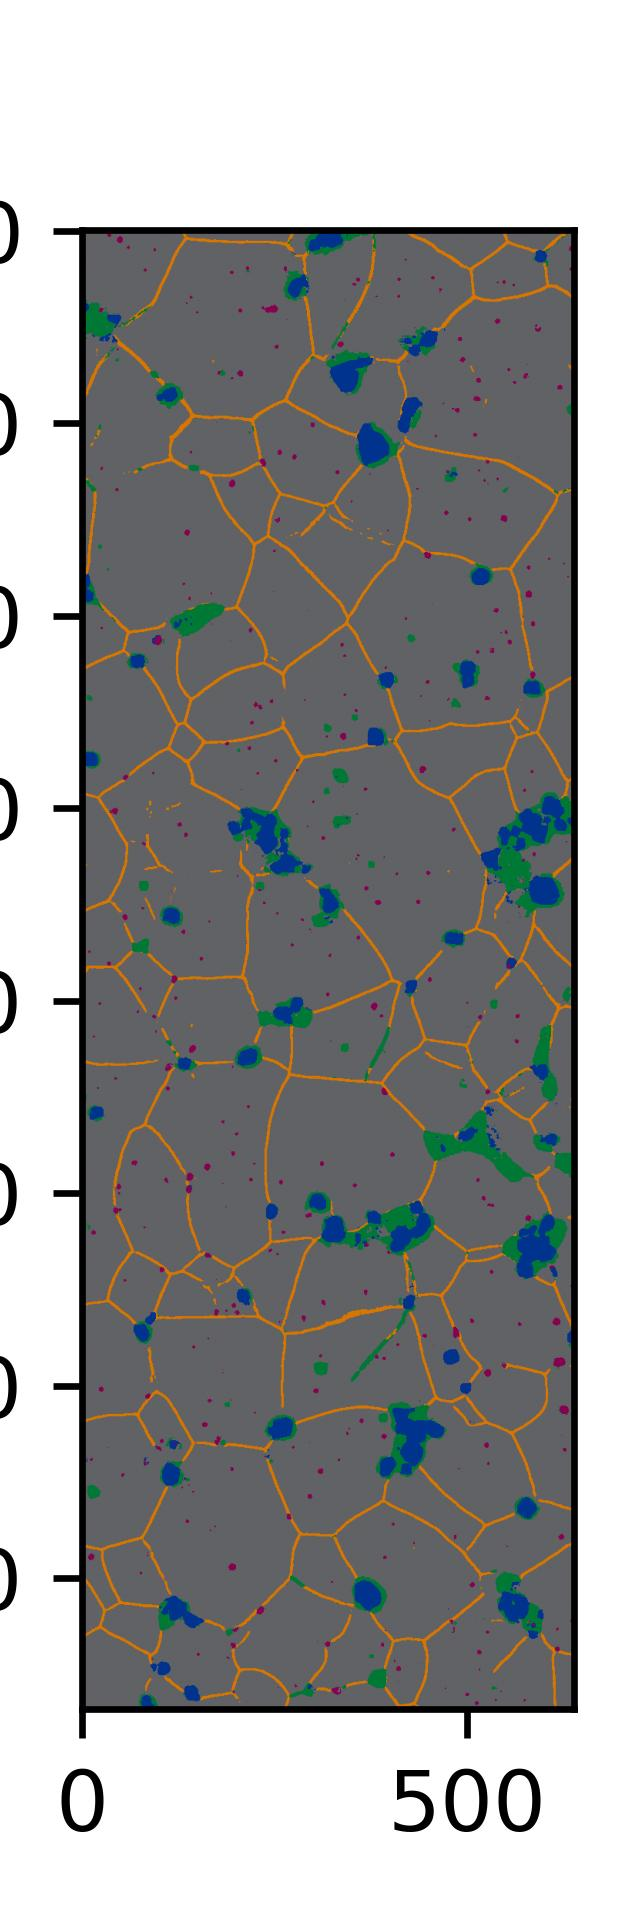

In [19]:
import os
from PIL import Image
from IPython.display import display
import numpy as np

# Define the base folder
image_base_folder = os.path.join(t.train_description, "image")

# Retrieve the list of prediction images and X_test images
pred_images = [
    os.path.join(image_base_folder, f"{t.file_prefix}_{file}_pred_image.jpg")
    for file in t.files
]

# Function to normalize and convert numpy array to PIL image
def array_to_img(array):
    normalized_array = np.uint8((array - array.min()) / (array.max() - array.min()) * 255)
    return Image.fromarray(normalized_array)

# Loop through each image and display it with a title
for file, img_path, x_test_img in zip(t.files, pred_images, t.X_test):
    # Display X_test image
    display_title_x_test = f"X_test Image for {file}"
    print(display_title_x_test)  # Print the title for X_test image
    display(array_to_img(x_test_img))  # Display the X_test image
    
    # Display prediction image
    display_title_pred = f"Predicted Image for {file}"
    print(display_title_pred)  # Print the title for prediction image
    display(Image.open(img_path))  # Display the prediction image
